In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


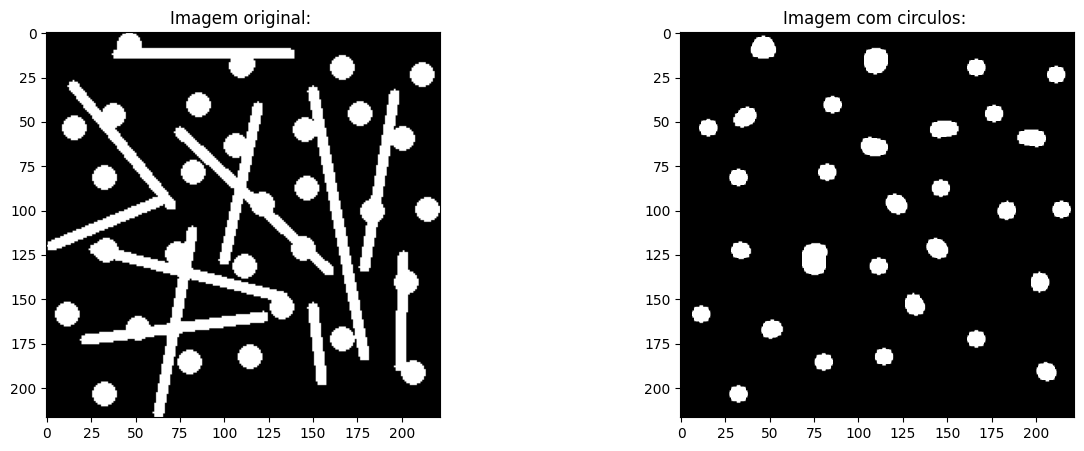

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

raio_circulo = 4
elemento_estruturante_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))



def dilatacao(img, elemEst):
    altura, largura = img.shape
    newImg = np.zeros((altura, largura))

    newImg = cv2.filter2D(img, cv2.CV_64F, elemEst)

    return newImg

def erosao(img, elemEst):
    linhas, colunas = img.shape
    nova_img = np.zeros((linhas, colunas), dtype=np.uint8)

    for i in range(linhas):
        for j in range(colunas):
            # Verificar se todos os pixels na vizinhança são brancos
            i_min, i_max = max(0, i - elemEst.shape[0] // 2), min(linhas, i + elemEst.shape[0] // 2 + 1)
            j_min, j_max = max(0, j - elemEst.shape[1] // 2), min(colunas, j + elemEst.shape[1] // 2 + 1)

            vizinhanca = img[i_min:i_max, j_min:j_max]

            if np.all(vizinhanca == 255):
                nova_img[i, j] = 255
            else:
                nova_img[i, j] = 0

    return nova_img

def abertura(img, elemEst):
    temp = (erosao(img, elemEst))
    newImg = dilatacao(temp, elemEst)

    return newImg

newImg1 = abertura(img=img1, elemEst=elemento_estruturante_circular)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1).set_title("Imagem original: ")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2).set_title("Imagem com circulos: ")
plt.imshow(newImg1, cmap='gray', vmin=0, vmax=255)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


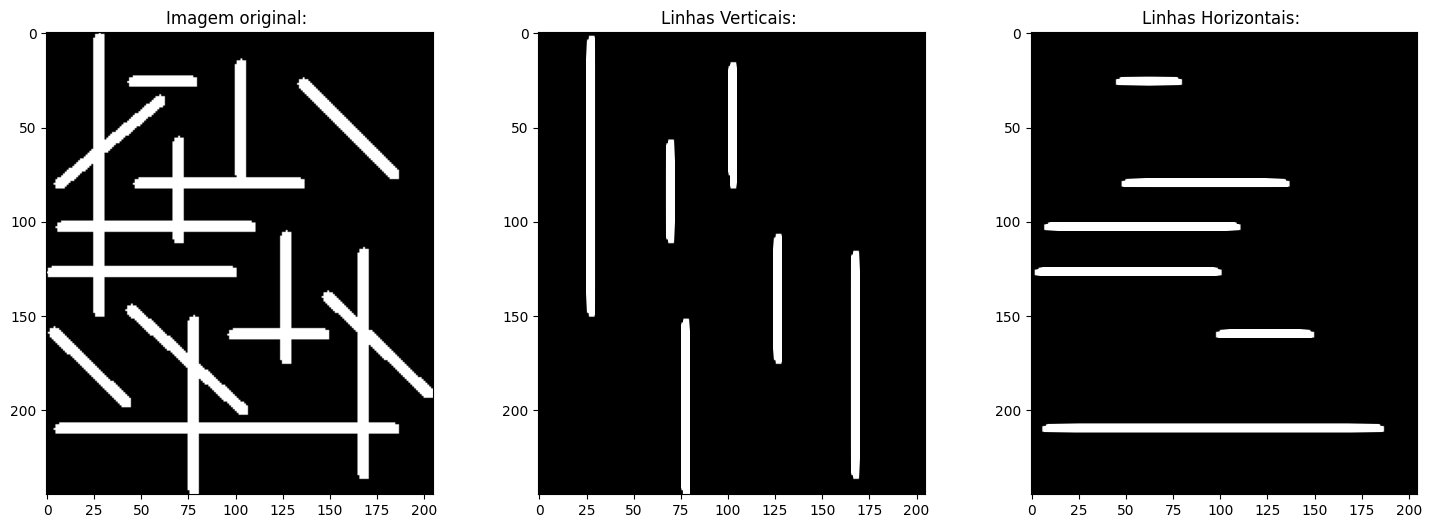

In [3]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)


#utilizando mascaras grandes para eliminar as linhas erradas
elemEstrutVertical = np.array([[0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0]])
elemEstrutHorizontal =  np.array([[0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0],
                                                                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
                                                                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

newImgA = abertura(img2, elemEstrutVertical)

newImgB = abertura(img2, elemEstrutHorizontal)


fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1).set_title("Imagem original: ")
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 2).set_title("Linhas Verticais: ")
plt.imshow(newImgA, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 3).set_title("Linhas Horizontais: ")
plt.imshow(newImgB, cmap='gray', vmin=0, vmax=255);

plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

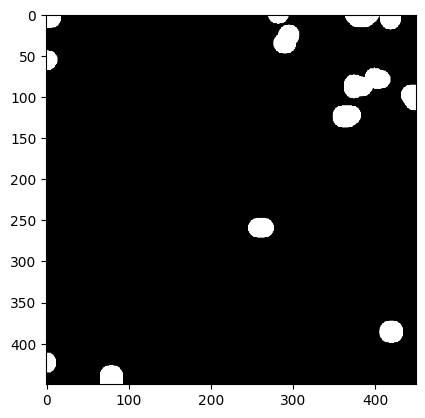

In [4]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

binaryImg = np.where(img3 > 210, 255, 0)

raio_circulo = 11
elemEstrutCircular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))


newImg = abertura(binaryImg, elemEstrutCircular) 

plt.imshow(newImg, cmap='gray', vmin=0, vmax=255);

In [5]:
import cv2
import numpy as np

# Carregar a imagem
imagem = cv2.imread('feijao.jpg', cv2.IMREAD_COLOR)

# Converter a imagem para escala de cinza
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar um desfoque para reduzir o ruído
imagem_blur = cv2.GaussianBlur(imagem_gray, (15, 15), 0)

# Aplicar uma binarização para destacar os feijões
_, imagem_binaria = cv2.threshold(imagem_blur, 120, 255, cv2.THRESH_BINARY)

# Aplicar uma operação de abertura para remover pequenos ruídos
kernel_abertura = np.ones((5, 5), np.uint8)
imagem_abertura = cv2.morphologyEx(imagem_binaria, cv2.MORPH_OPEN, kernel_abertura)

# Aplicar uma operação de fechamento para unir feijões próximos
kernel_fechamento = np.ones((15, 15), np.uint8)
imagem_fechamento = cv2.morphologyEx(imagem_abertura, cv2.MORPH_CLOSE, kernel_fechamento)

# Encontrar contornos na imagem após as operações morfológicas
contornos, _ = cv2.findContours(imagem_fechamento, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos na imagem original (opcional)
cv2.drawContours(imagem, contornos, -1, (0, 255, 0), 2)

# Contar a quantidade de feijões com base na área dos contornos
contador_feijoes = 0
for contorno in contornos:
    area = cv2.contourArea(contorno)
    # Ajustar o limiar de área conforme necessário
    if area > 800:
        contador_feijoes += 1

# Exibir a imagem com os contornos
cv2.imshow('Contornos', imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Imprimir o número de feijões contados
print(f'Número de feijões: {contador_feijoes}')


4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

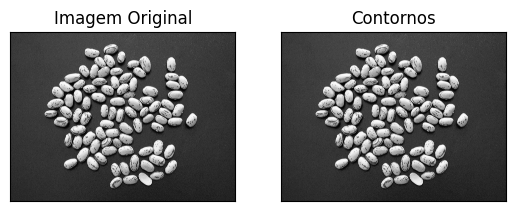

Número de células: 1


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Carregue a imagem em tons de cinza
img = cv2.imread('feijao.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar uma transformação morfológica para melhorar a segmentação
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)

# Aplicar uma operação de fechamento para remover pequenos buracos na imagem
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

# Binarizar a imagem usando um limiar adaptativo
thresh = cv2.adaptiveThreshold(closing, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Encontrar contornos na imagem binarizada
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos pequenos e grandes (ajuste os valores conforme necessário)
min_contour_area = 100
max_contour_area = 5000
filtered_contours = [cnt for cnt in contours if min_contour_area < cv2.contourArea(cnt) < max_contour_area]

# Criar uma cópia da imagem original para desenhar os contornos
img_with_contours = img.copy()

# Desenhar os contornos na imagem de cópia
cv2.drawContours(img_with_contours, filtered_contours, -1, (0, 255, 0), 2)

# Exibir a imagem original e a imagem com os contornos
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_with_contours, cmap='gray')
plt.title('Contornos'), plt.xticks([]), plt.yticks([])

plt.show()

# Exibir o número de células encontradas
print(f'Número de células: {len(filtered_contours)}')


In [4]:
import cv2
import numpy as np

# Carregar a imagem
imagem = cv2.imread('feijao.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    print('Erro ao carregar a imagem.')
    exit()

# Binarizar a imagem com um threshold de 123
_, binarizada = cv2.threshold(imagem, 123, 255, cv2.THRESH_BINARY)

# Encontrar os componentes conectados
rotulos, componentes = cv2.connectedComponents(binarizada)

# Calcular o tamanho de cada componente
tamanhos = np.bincount(rotulos)

# Filtrar componentes pequenos (tamanho mínimo desejado)
tamanho_minimo = 100  # Ajuste conforme necessário
elementos_filtrados = np.where(tamanhos >= tamanho_minimo)[0]

# O número de elementos é o número de rótulos filtrados
numero_elementos = len(elementos_filtrados)

# Exibir o resultado
print(f'Número de elementos na imagem: {numero_elementos}')


ValueError: object of too small depth for desired array

5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

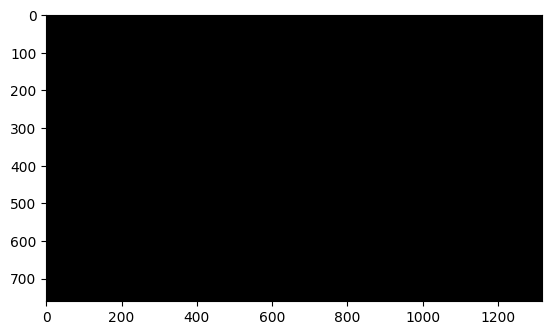

In [6]:
img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)

#apliquei a img no otsu e descobrir q 161 é o melhor K
binaryImg = np.where(img5 > 161, 255, 0)
height, width = 10, 10

ufu_logo = np.zeros((height, width), dtype=np.uint8)

# Adicionar a forma estilizada de "U" na matriz
ufu_logo[2:8, 2:4] = 255
ufu_logo[2:8, 6:8] = 255
ufu_logo[7:8, 2:6] = 255

ufu_logo_background = np.zeros((height, width))

ufu_logo_background = 255 - ufu_logo

def hit_or_miss(img, forground, background):
    erosaoForground = erosao(img, forground)
    erosaoBackground = erosao(img, background)
    result = np.zeros_like(img)
    
    
    return result


newImg = hit_or_miss(binaryImg, ufu_logo, ufu_logo_background)
#newImg = 255*(newImg - newImg.min())/(newImg.max() - newImg.min())


plt.imshow(newImg, cmap='gray', vmin=0, vmax=255);

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

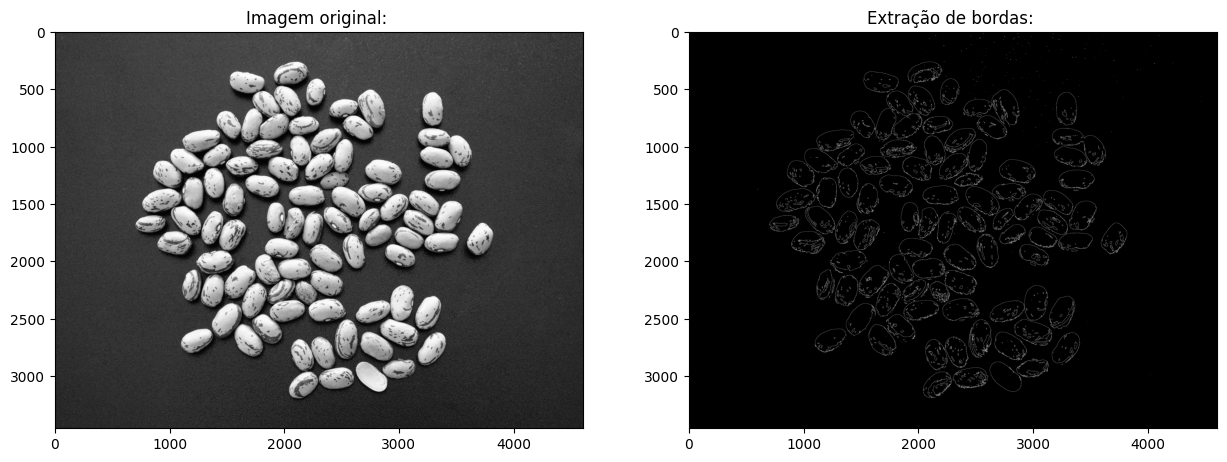

In [ ]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

#com base no ultimo lab, apliquei essa imagem no Otsu e obtive que o melhor valor de K é 123
binaryImg = np.where(img4 > 123, 255, 0)

raio_circulo = 1
elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))

def extracaoFronteiras(img):
    newImgErosao = erosao(img, elem)
    newImg = img - newImgErosao
    return newImg

newImg = extracaoFronteiras(binaryImg)
fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1).set_title("Imagem original: ")
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 2, 2).set_title("Extração de bordas: ")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255);